# Business Intelligence Lab
# Experiment 03

### Aim:
To preprocess dataset using different preprocessing techniques

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data

In [2]:
bengaluru=pd.read_csv('https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/Bengaluru_House_Data.csv')

In [3]:
bengaluru.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
10449,Built-up Area,Ready To Move,Hennur,2 BHK,NaN,1420,2.0,1.0,62.0
11205,Built-up Area,Ready To Move,Jakkasandra Extension,2 BHK,NaN,950,2.0,3.0,57.0
5626,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1455,2.0,NaN,69.0
7105,Super built-up Area,Ready To Move,Kaverappa Layout,3 BHK,NaN,1540,3.0,3.0,85.0
7297,Super built-up Area,18-Jul,8th Phase JP Nagar,1 BHK,Maian M,500,1.0,1.0,30.0


### Information about Data

In [4]:
#Shape of the data
bengaluru.shape

(13320, 9)

In [5]:
#Data type of columns
bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
#Mathematical columns
bengaluru.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


# Data preprocessing <br>
Data preprocessing is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying machine learning or data mining algorithms.


## Data Cleaning <br>
Data Cleaning means the process of identifying the incorrect, incomplete, inaccurate, irrelevant or missing part of the data and then modifying, replacing or deleting them according to the necessity. Data cleaning is considered a foundational element of basic data science.
Machine Learning is a data- driven AI. In machine learning, if the data is irrelevant or error-prone then it leads to an incorrect model building. As much as you make your data clean, as much as you can make a better model. So, we need to process or clean the data before using it. Without the quality data,it would be foolish to expect anything good. 


### Handling Missing Data <br>
Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset. In the dataset, blank shows the missing values. In Pandas, usually, missing values are represented by NaN. <br>
Handling missing values is an important step in data cleaning that can impact model validity and reliability. <br>
There are 2 primary ways of handling missing values:
 - Deleting the Missing Values
 - Imputing the Missing Values
  - Replacing with a arbitrary/default value 
  - Replacing With Mean Value
  - Replacing With Mode
  - Replacing with previous value – Forward fill
  - Replacing with next value – Backward fill



In [7]:
#To find the total number of null elements in each column
bengaluru.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### Location

In [8]:
bengaluru['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [9]:
#Filling the NaN element with the majority ones
bengaluru['location']=bengaluru['location'].fillna('Whitefield')

In [10]:
bengaluru.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### Size

In [11]:
bengaluru['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [12]:
#Filling the NaN element with the majority ones
bengaluru['size'] = bengaluru['size'].fillna('2 BHK')

In [13]:
bengaluru.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### Society

In [14]:
bengaluru['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [15]:
#Filled the NaN values with 'Information not Available'
bengaluru['society']=bengaluru['society'].fillna('Information Not Available')

In [16]:
bengaluru['society'].value_counts()

Information Not Available    5502
GrrvaGr                        80
PrarePa                        76
Sryalan                        59
Prtates                        59
                             ... 
Amionce                         1
JaghtDe                         1
Jauraht                         1
Brity U                         1
RSntsAp                         1
Name: society, Length: 2689, dtype: int64

In [17]:
bengaluru.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

#### Bath

In [18]:
bengaluru['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [19]:
#Filling the NaN values to the mode of the column which is 2.0
bengaluru["bath"]=bengaluru["bath"].fillna(bengaluru["bath"].mode()[0])

In [20]:
bengaluru.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath              0
balcony         609
price             0
dtype: int64

#### Balcony

In [21]:
bengaluru['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [22]:
#Filling the NaN values to the mode of the column which is 2.0
bengaluru["balcony"]=bengaluru["balcony"].fillna(bengaluru["balcony"].mode()[0])

In [23]:
bengaluru.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

### Handling Outliers <br>
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

Methods to identify outliers in the data:
- Box plots
- IQR method
- Z-score method
- ‘Distance from the mean’ method (Multivariate method) <br>

Ways to handle outliers:
- Deleting observations
- Transforming values
- Imputation
- Winsorization
- Binning

#### Price

In [24]:
Data2 = bengaluru
Data2["zscore"]=(Data2.price-Data2.price.mean())/Data2.price.std()
Data2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.493353
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.049905
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Information Not Available,1440,2.0,3.0,62.00,-0.339431
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.117913
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Information Not Available,1200,2.0,1.0,51.00,-0.413271


In [25]:
# outliers
Data2[(Data2.zscore<-4)|(Data2.zscore>4)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
159,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,Information Not Available,3750,4.0,0.0,760.0,4.346023
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,Information Not Available,12000,6.0,3.0,2200.0,14.012291
605,Super built-up Area,19-Jan,Malleshwaram,7 BHK,Information Not Available,12000,7.0,3.0,2200.0,14.012291
743,Super built-up Area,Ready To Move,Cunningham Road,4 BHK,Information Not Available,5270,4.0,3.0,1250.0,7.635239
1044,Plot Area,Ready To Move,Binnamangala,6 Bedroom,Information Not Available,3968,5.0,2.0,900.0,5.285799
...,...,...,...,...,...,...,...,...,...,...
12987,Plot Area,Ready To Move,Dodsworth Layout,6 Bedroom,Information Not Available,30400,4.0,2.0,1824.0,11.488321
13067,Plot Area,Ready To Move,Defence Colony,10 Bedroom,Information Not Available,7150,13.0,2.0,3600.0,23.410050
13086,Super built-up Area,Ready To Move,Sindhi Colony,5 BHK,HMeuran,5665.84,7.0,2.0,988.0,5.876516
13197,Plot Area,Ready To Move,Ramakrishnappa Layout,4 Bedroom,Information Not Available,9200,4.0,2.0,2600.0,16.697365


In [26]:
# Remove the outliers from the Data points
Data4= Data2[(Data2.zscore>-4)&(Data2.zscore<4)]
bengaluru = Data4.drop('zscore', axis='columns')
bengaluru

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Information Not Available,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Information Not Available,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Information Not Available,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


#### Size

In [27]:
#Removing BHK,bedroom and RK from the 'size' column
bengaluru['size']=bengaluru['size'].str.split().str[0]
#Converting the data type of 'size' column to int32 to remove the decimal point
bengaluru['size']=bengaluru['size'].astype('int32')
bengaluru['size']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13213, dtype: int32

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


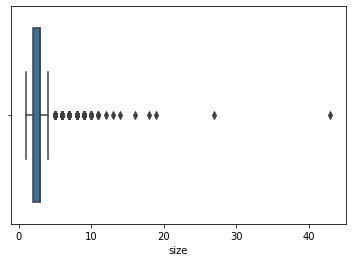

In [28]:
sns.boxplot(bengaluru['size'])

In [29]:
#Removing the outliers which are more than 10
bengaluru=bengaluru.drop(bengaluru[bengaluru['size']>10].index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


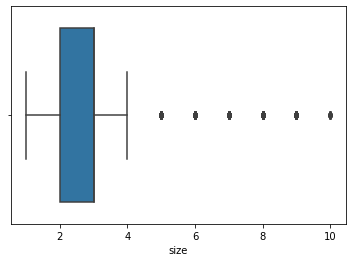

In [30]:
sns.boxplot(bengaluru['size'])

#### Bath

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


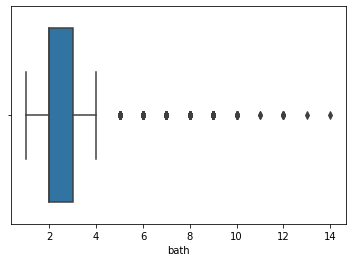

In [31]:
sns.boxplot(bengaluru['bath'])

In [32]:
#Removing the outliers
bengaluru=bengaluru.drop(bengaluru[bengaluru['bath']>5].index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


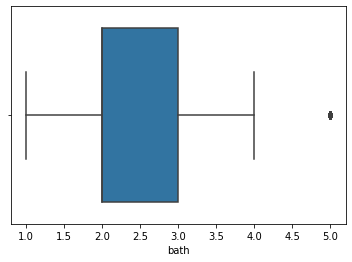

In [33]:
sns.boxplot(bengaluru['bath'])

## Data Transformation <br>
Data transformation is the process of converting raw data into a format or structure that would be more suitable for model building and also data discovery in general. It is an imperative step in feature engineering that facilitates discovering insights.
<br>
### Label Encoding
This approach is very simple and it involves converting each value in a column to a number. Consider a dataset of bridges having a column named bridge-types having below values. Though there will be many more columns in the dataset, to understand label-encoding, we will focus on one categorical column only. <br>
preprocessing.LabelEncoder() of sklearn is used for label encoding.<br>
In our dataset we use this on Vehicle Style and Model

### One-Hot Encoder
Though label encoding is straight, it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. Let’s consider the previous example of bridge type and safety levels with one-hot encoding.<br>
In our dataset we use this on Transmission Type and Vehicle Size


### One-Hot Encoding for Area Type

In [34]:
df = bengaluru
dummies = pd.get_dummies(df.area_type)
dummies.head(3)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0


In [35]:
df1 = pd.concat([df,dummies], axis='columns')
bengaluru = df1.drop('area_type', axis='columns')
bengaluru

,availability,location,size,society,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07,0,0,0,1
1,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00,0,0,1,0
2,Ready To Move,Uttarahalli,3,Information Not Available,1440,2.0,3.0,62.00,1,0,0,0
3,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00,0,0,0,1
4,Ready To Move,Kothanur,2,Information Not Available,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.00,1,0,0,0
13316,Ready To Move,Richards Town,4,Information Not Available,3600,5.0,2.0,400.00,0,0,0,1
13317,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.00,1,0,0,0
13318,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.0,488.00,0,0,0,1


### Data Normalization
Feature scaling refers to putting the values in the same range or same scale so that no variable is dominated by the other.

Numerical data in the dataset can have a varied range i.e. one parameter may lie between 1 to 10 for all records whereas another parameter can lie between 1000 to 5000. Though data is logically correct but after passing to a particular algorithm, the features with higher magnitude become key parameters for that algorithm.

To avoid such situations feature scaling is performed using some statistical techniques like Min-Max scaling & Mean normalization. This creates a common range for all the parameters and thus removes Algorithmic bias.

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.


In [36]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

df = bengaluru[['size','bath','balcony','price']]
bengaluru_minmax = min_max_scaler.fit_transform(df)

In [37]:
pd.DataFrame(bengaluru_minmax)

,0,1,2,3
0,0.125,0.25,0.333333,0.044899
1,0.375,1.00,1.000000,0.161850
2,0.250,0.25,1.000000,0.078035
3,0.250,0.50,0.333333,0.125723
4,0.125,0.25,0.333333,0.062139
...,...,...,...,...
12719,0.500,0.75,0.000000,0.322254
12720,0.375,1.00,0.666667,0.566474
12721,0.125,0.25,0.333333,0.075145
12722,0.375,0.75,0.333333,0.693642


### Z-Score Transformation
In statistics, a z-score tells us how many standard deviations away a value is from the mean. We use the following formula to calculate a z-score:

z = (X – μ) / σ

where:

X is a single raw data value <br>
μ is the population mean<br>
σ is the population standard deviation

In [38]:
import scipy.stats as stats
df = bengaluru[['size','bath','balcony','price']]
pd.DataFrame(stats.zscore(df))

,0,1,2,3
0,-0.709340,-0.560298,-0.742703,-0.670044
1,1.517289,2.809435,1.774317,0.237696
2,0.403975,-0.560298,1.774317,-0.412853
3,0.403975,0.562946,-0.742703,-0.042713
4,-0.709340,-0.560298,-0.742703,-0.536233
...,...,...,...,...
12719,2.630603,1.686191,-2.001213,1.482712
12720,1.517289,2.809435,0.515807,3.378276
12721,-0.709340,-0.560298,-0.742703,-0.435285
12722,1.517289,1.686191,-0.742703,4.365316


### Data Reduction
**Dimensionality Reduction** <br>
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [39]:
df = bengaluru
location_stats = df['location'].value_counts(ascending=False)
location_stats

Whitefield                        532
Sarjapur  Road                    387
Electronic City                   301
Kanakpura Road                    269
Thanisandra                       231
                                 ... 
Okalipura                           1
Vasantapura main road               1
1st Stage Radha Krishna Layout      1
Dwarka Nagar                        1
Abshot Layout                       1
Name: location, Length: 1257, dtype: int64

In [40]:
len(df.location.unique())

1257

In [41]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Tindlu                            10
Laggere                           10
Ganga Nagar                       10
Nagasandra                        10
Vishwapriya Layout                10
                                  ..
Okalipura                          1
Vasantapura main road              1
1st Stage Radha Krishna Layout     1
Dwarka Nagar                       1
Abshot Layout                      1
Name: location, Length: 1028, dtype: int64

In [42]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

230